<pre style='font-size : 25px; text-align : center '><b>ASSIGNMENT 2</b></pre>
<pre style='font-size : 20px;'><b>PREDICTING HOUSING PRICES (INTERMIDIATE MODE)</b></pre>
<pre style='font-size : 15px'>Today we will continue working with boston housing data. Recap from the previous lesson that we managed to train the <i>linear regression</i> classifier on two features and as the result obtained mse score of 44 on train and 38 on test data. This time we will use <i>linear regression</i> on all the features and on only correlated ones. We will also try using <i>polynomial regression</i> to solve the problem. Finnaly, we will compare the results with the one from the previous assignment. </pre>
 
<i>Note : that's a test version of a notebook</i>

<pre style='font-size : 20px'><b>PART 1</b></pre>
<pre style='font-size : 18px'><b>Using linear regression on all the features</b></pre>
<pre style='font-size : 15px;'>First let's import necessary packages. </pre>

In [1]:
#you can see some warning messages below, but don't worry they won't effect your code
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

<pre style='font-size : 15px'>Now it's time to load our dataset, that we already stored in files/ folder</pre>

In [2]:
#you can use ! charcter before expressions to perform basic linux commands
#expected to see boston_data.csv as output, if you don't see this, please run first assignment ones again 
! ls ../files/

boston_data.csv


In [3]:
df = pd.read_csv('../files/boston_data.csv')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
train_columns = list(df.columns)

In [6]:
target_column = train_columns.pop(-1)

In [7]:
train_columns

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [8]:
target_column

'target'

In [9]:
#we will set a random seed for the same results
seed = 5

In [10]:
train_set, test_set = train_test_split(df,test_size=0.25, random_state=seed)

In [11]:
X_train, y_train, X_test, y_test = train_set[train_columns], train_set[target_column],\
test_set[train_columns], test_set[target_column]

<pre style='font_size : 15px'>It's time to create, train and evaluate our classifier</pre>

In [12]:
clf = LinearRegression()

In [13]:
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_predicted_train = clf.predict(X_train)

In [15]:
print("Mean squared error on train data : {0}".format(mean_squared_error(y_predicted_train,y_train)))

Mean squared error on train data : 21.51417402223371


In [16]:
y_predicted_test = clf.predict(X_test)

In [17]:
print("Mean squared error on test data : {0}".format(mean_squared_error(y_predicted_test,y_test)))

Mean squared error on test data : 24.27460831168783


<pre style='font-size : 15px'>Using all the features we got much better results. One thing to notice is that the mse score on train data is lower then on test one which is the sign of <i>overfitting</i> about which we will speak more concrete in the next lab, but for now let's move on with this one.</pre>

<pre style='font-size : 20px'><b>PART 2</b></pre>
<pre style='font-size : 18px'><b>Using linear regression on only highly correlated features</b></pre>

<pre style='font-size :15px'>One option to try here is to use only those features that are highly correlated with our target value. </pre>

In [18]:
correlation  = df.corr()

In [19]:
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [20]:
correlation['target'].sort_values(ascending=False)

target     1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: target, dtype: float64

<pre style='font-size : 15px'>We see that only few features have correlation score bigger then 0, let's try use them instead of fitting all data to our algorithm</pre>

In [41]:
correlated_columns = list(correlation['target'].sort_values(ascending=False).index[:6])

In [42]:
target_column = correlated_columns.pop(0)

In [43]:
X_train, y_train, X_test, y_test = train_set[correlated_columns], train_set[target_column],\
test_set[correlated_columns], test_set[target_column]

In [44]:
clf = LinearRegression()

In [45]:
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_predicted_train = clf.predict(X_train)

In [47]:
print("Mean squared error on train data : {0}".format(mean_squared_error(y_predicted_train,y_train)))

Mean squared error on train data : 36.58012133603801


In [48]:
y_predicted_test = clf.predict(X_test)

In [49]:
print("Mean squared error on test data : {0}".format(mean_squared_error(y_predicted_test,y_test)))

Mean squared error on test data : 35.41158609834537


<pre style='font-size :15px'>Seems that using only highly correlated features didn't prove the result. Since the decision boundary might be more complex then just linear next option is to try using polynomial regression instead of a linear one   </pre>

<pre style='font-size : 20px'><b>PART 3</b></pre>
<pre style='font-size : 18px'><b>Using polynomial regression for solving the task</b></pre>

In [241]:
from sklearn.preprocessing import PolynomialFeatures

In [242]:
clf = LinearRegression()

In [243]:
train_set, test_set = train_test_split(df,test_size=0.25, random_state=seed)

In [244]:
X_train, y_train, X_test, y_test = train_set[correlated_columns], train_set[target_column],\
test_set[correlated_columns], test_set[target_column]

<pre style='font-size : 15px'>To use polynomial regression we firstly need to process them via PolynomialFeatures class</pre>

In [245]:
#C- degree of polynom. Feel free to play around with number and see the perfomance of the model depending on it
C = 2

In [246]:
poly = PolynomialFeatures(C,include_bias=False)

In [247]:
poly_features_train = poly.fit_transform(X_train)

In [248]:
clf.fit(poly_features_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [249]:
poly_features_test = poly.transform(X_test)

In [250]:
y_predicted_train = clf.predict(poly_features_train)

In [251]:
print("Mean squared error on train data : {0}".format(mean_squared_error(y_predicted_train,y_train)))

Mean squared error on train data : 26.874905226423536


In [252]:
y_predicted_test = clf.predict(poly_features_test)

In [253]:
print("Mean squared error on test data : {0}".format(mean_squared_error(y_predicted_test,y_test)))

Mean squared error on test data : 31.184726173042613


<pre style='font-size : 20px'><b>PART 4 (OPTIONAL)</b></pre>
<pre style='font-size : 18px'><b>Plotting decision boundaries and digging into predictions</b></pre>

<pre style='font-size : 15px'>Let's now make a table of predictions on test data and visually compare it versus real target value</pre>

In [50]:
test_set['predicted']=y_predicted_test

/home/volodymyr/envs/courses_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
test_set[['target','predicted']]

,target,predicted
226,37.6,36.672445
292,27.9,30.404151
90,22.6,23.577520
373,13.8,11.615264
273,35.2,39.229909
...,...,...
334,20.7,22.217745
331,17.1,19.672254
53,23.4,21.193229
101,26.5,26.662732


<pre style='font-size : 15px'>Now we can see how much samples from test set our model missclassified</pre>

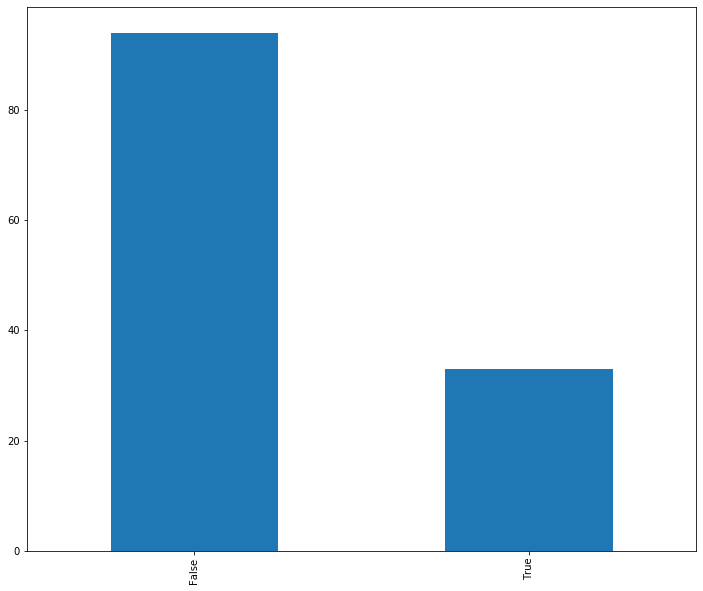

In [71]:
(test_set["target"]==test_set["predicted"]).value_counts().plot.bar(figsize=(12,10))

In [72]:
(test_set["target"]==test_set["predicted"]).value_counts()

False    94
True     33
dtype: int64

In [77]:
test_set[test_set["target"]!=test_set["predicted"]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,predicted
226,0.38214,0.0,6.20,0.0,0.5040,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6,37.6
292,0.03615,80.0,4.95,0.0,0.4110,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70,27.9,27.9
90,0.04684,0.0,3.41,0.0,0.4890,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81,22.6,22.6
373,11.10810,0.0,18.10,0.0,0.6680,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8,13.8
273,0.22188,20.0,6.96,1.0,0.4640,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58,35.2,35.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.17004,12.5,7.87,0.0,0.5240,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,18.9
244,0.20608,22.0,5.86,0.0,0.4310,5.593,76.5,7.9549,7.0,330.0,19.1,372.49,12.50,17.6,17.6
306,0.07503,33.0,2.18,0.0,0.4720,7.420,71.9,3.0992,7.0,222.0,18.4,396.90,6.47,33.4,33.4
331,0.05023,35.0,6.06,0.0,0.4379,5.706,28.4,6.6407,1.0,304.0,16.9,394.02,12.43,17.1,17.1


In [83]:
print("{}% of test set classified correctly" \
      .format((len(test_set[test_set["target"]==test_set["predicted"]])/len(test_set))*100))

25.984251968503933% of test set classified correctly


In [84]:
print("{}% of test set classified correctly" \
      .format((len(test_set[test_set["target"]!=test_set["predicted"]])/len(test_set))*100))

74.01574803149606% of test set classified correctly


<pre style='font-size : 15px'>By measuring our predictions using the exact match (accuracy) we see that only 25% of test data is classified correctly, but since we are working with regression task, we aren't interested in the exact match but in an approximate one. Thus let's see the misclassified examples and compare them to the real ones </pre>

In [93]:
for i in zip(test_set[test_set["target"]!=test_set["predicted"]]['predicted'].values,test_set[test_set["target"]!=test_set["predicted"]]['target'].values):
    print('Predicted : {}; Real : {}'.format(i[0],i[1]))

Predicted : 37.59999999999998; Real : 37.6
Predicted : 27.900000000000006; Real : 27.9
Predicted : 22.599999999999998; Real : 22.6
Predicted : 13.800000000000004; Real : 13.8
Predicted : 35.199999999999996; Real : 35.2
Predicted : 10.400000000000011; Real : 10.4
Predicted : 23.899999999999995; Real : 23.9
Predicted : 22.799999999999997; Real : 22.8
Predicted : 23.199999999999996; Real : 23.2
Predicted : 33.19999999999999; Real : 33.2
Predicted : 36.09999999999999; Real : 36.1
Predicted : 17.200000000000003; Real : 17.2
Predicted : 17.900000000000006; Real : 17.9
Predicted : 15.000000000000007; Real : 15.0
Predicted : 8.10000000000001; Real : 8.1
Predicted : 22.999999999999996; Real : 23.0
Predicted : 44.79999999999997; Real : 44.8
Predicted : 23.099999999999998; Real : 23.1
Predicted : 10.80000000000001; Real : 10.8
Predicted : 23.099999999999998; Real : 23.1
Predicted : 22.199999999999996; Real : 22.2
Predicted : 24.10000000000001; Real : 24.1
Predicted : 17.300000000000004; Real : 17

<pre style='font-size : 15px'>Seems that the difference between predicted and real value is minimal, which actually means that our classifier performs nicely. Last thing we will do is plotting the decision boundary of our algorithm</pre>

In [94]:
import matplotlib.pyplot as plt

In [ ]:
#we will use 
plt.scatter(test_set[],test_set['target'])